In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/breast_cancer.csv')
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df = data.drop(['Sample code number', 'Class'], axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1
679,2,1,1,1,2,1,1,1,1
680,5,10,10,3,7,3,8,10,2
681,4,8,6,4,3,4,10,6,1


In [7]:
data.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

<Axes: >

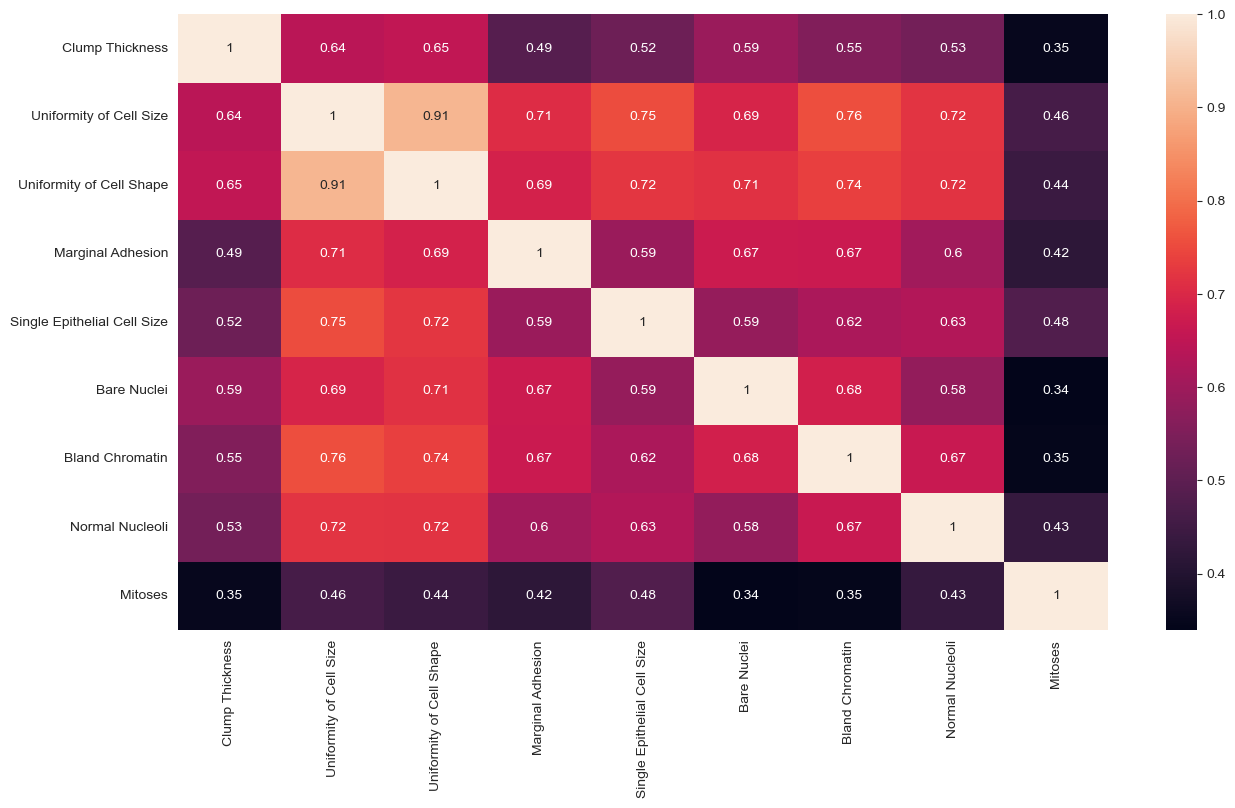

In [9]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)

<Axes: >

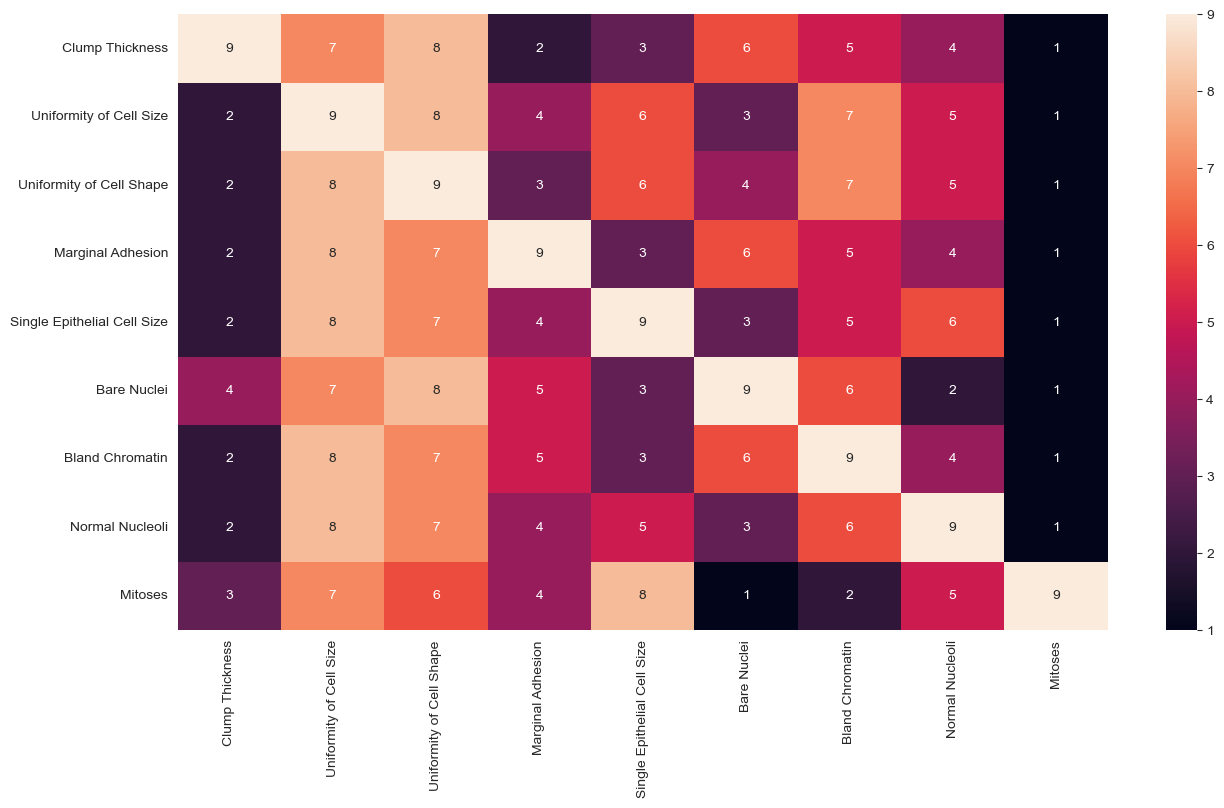

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr().rank(axis=1), annot=True)

<Axes: xlabel='Uniformity of Cell Shape', ylabel='Normal Nucleoli'>

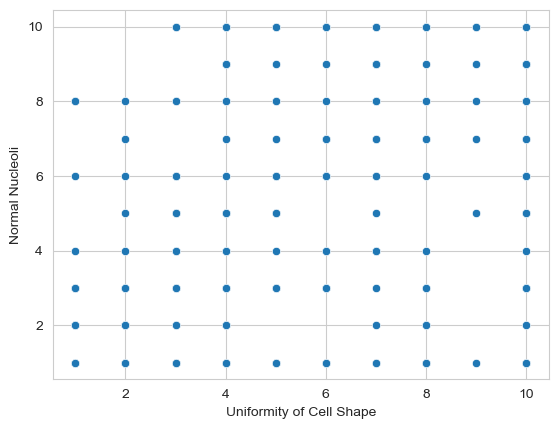

In [12]:
sns.scatterplot(x=df['Uniformity of Cell Shape'], y=df['Normal Nucleoli'])

<Axes: xlabel='Mitoses', ylabel='Single Epithelial Cell Size'>

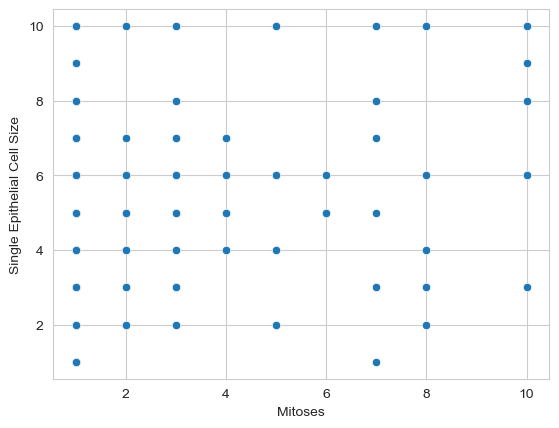

In [14]:
sns.scatterplot(x=df['Mitoses'], y=df['Single Epithelial Cell Size'])

In [33]:
sc = MinMaxScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df), columns=df.columns)

In [34]:
scaled_df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000


In [35]:
pca = PCA(n_components=None)
pca.fit(scaled_df)

PCA()

In [36]:
pca.explained_variance_ratio_

array([0.69050756, 0.07195066, 0.06055921, 0.04442012, 0.03900513,
       0.03443899, 0.02529478, 0.02246508, 0.01135845])

In [37]:
pca.explained_variance_ratio_.sum()

1.0

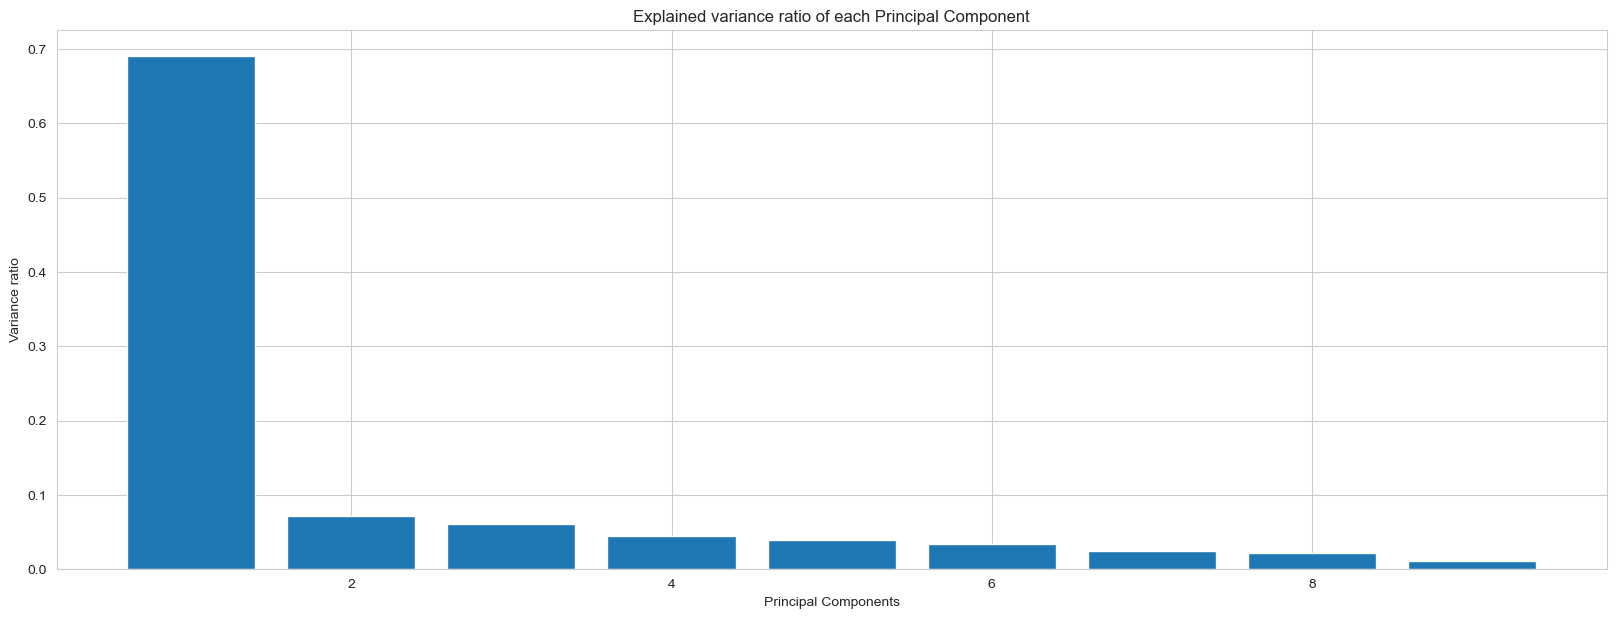

In [38]:
plt.figure(figsize=(20, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, label='Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance ratio')
plt.title('Explained variance ratio of each Principal Component')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

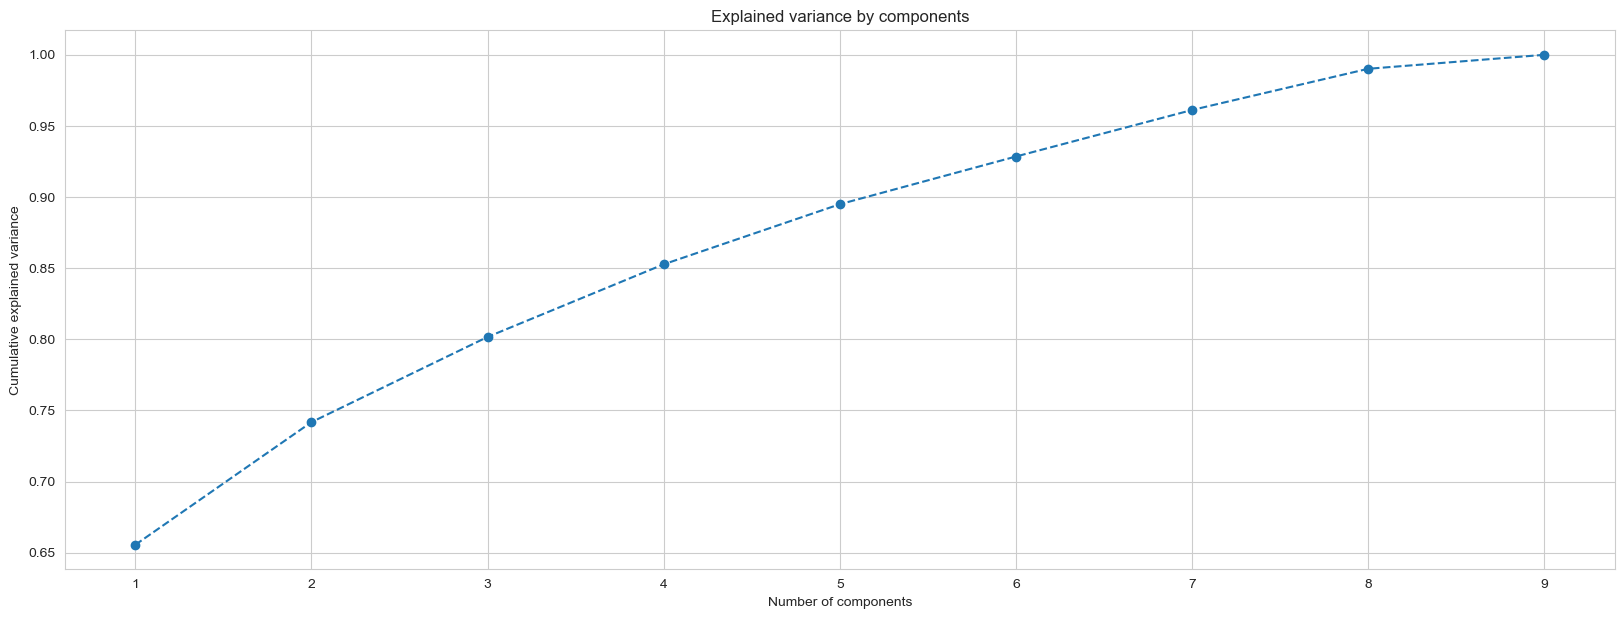

In [32]:
plt.figure(figsize=(20, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [40]:
pca = PCA(2)
pca.fit(scaled_df)

PCA(n_components=2)

In [42]:
pca.explained_variance_ratio_.sum()

0.7624582285922402

In [47]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(scaled_df.T))

print(f'Eigenvectors: {eig_vecs}')
print(f'Eigenvalues: {eig_vals}')

Eigenvectors: [[-0.29673577  0.07350664  0.85200897 -0.00643272  0.04706374 -0.39976537
   0.09754668 -0.08795577  0.03612583]
 [-0.40397067 -0.22992885  0.02627438 -0.72530059  0.29461882  0.33796907
   0.09240845  0.13045578 -0.17495075]
 [-0.39275858 -0.16470098  0.07445454  0.66840395  0.20651466  0.37015092
   0.08733061  0.24226147 -0.34688571]
 [-0.33120214  0.09819754 -0.47385846  0.04246451  0.39419863 -0.64249922
   0.18980035 -0.12769869 -0.18381614]
 [-0.24973982 -0.20021505 -0.03165568  0.11389555  0.18882266  0.19505447
  -0.40135442 -0.75394913  0.28345153]
 [-0.44261347  0.78056963 -0.09341837 -0.06126616 -0.29438441  0.16867448
  -0.25296268  0.01838232 -0.05368932]
 [-0.29207832 -0.00847974 -0.12241209  0.0873777  -0.04122305  0.09259014
   0.46305857  0.18371288  0.79596032]
 [-0.35453597 -0.46919452 -0.13372376 -0.02847686 -0.75394927 -0.19689024
   0.00420984 -0.05796151 -0.15775058]
 [-0.12457633 -0.18806889 -0.02663127  0.01261209  0.14313933 -0.24962286
  -0.706

In [48]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(eig_pairs)

[(0.605523033685836, array([-0.29673577, -0.40397067, -0.39275858, -0.33120214, -0.24973982,
       -0.44261347, -0.29207832, -0.35453597, -0.12457633])), (0.06309530386281782, array([ 0.07350664, -0.22992885, -0.16470098,  0.09819754, -0.20021505,
        0.78056963, -0.00847974, -0.46919452, -0.18806889])), (0.053105860472574845, array([ 0.85200897,  0.02627438,  0.07445454, -0.47385846, -0.03165568,
       -0.09341837, -0.12241209, -0.13372376, -0.02663127])), (0.009960507438774153, array([-0.00643272, -0.72530059,  0.66840395,  0.04246451,  0.11389555,
       -0.06126616,  0.0873777 , -0.02847686,  0.01261209])), (0.038953095526703424, array([ 0.04706374,  0.29461882,  0.20651466,  0.39419863,  0.18882266,
       -0.29438441, -0.04122305, -0.75394927,  0.14313933])), (0.03420455732301787, array([-0.39976537,  0.33796907,  0.37015092, -0.64249922,  0.19505447,
        0.16867448,  0.09259014, -0.19689024, -0.24962286])), (0.030200398174428076, array([ 0.09754668,  0.09240845,  0.087

In [49]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in (eig_vals)]
cum_var_exp = np.cumsum(var_exp)

In [54]:
print(f'Variance captured by each component is {var_exp}')
print(f'Cumulative variance captured as we travel each component {cum_var_exp}')

Variance captured by each component is [69.05075641936105, 7.1950664398630195, 6.055921297677492, 1.1358454339572976, 4.442012213180351, 3.900513151030981, 3.443899277318158, 2.246508137206349, 2.529477630405303]
Cumulative variance captured as we travel each component [ 69.05075642  76.24582286  82.30174416  83.43758959  87.8796018
  91.78011496  95.22401423  97.47052237 100.        ]


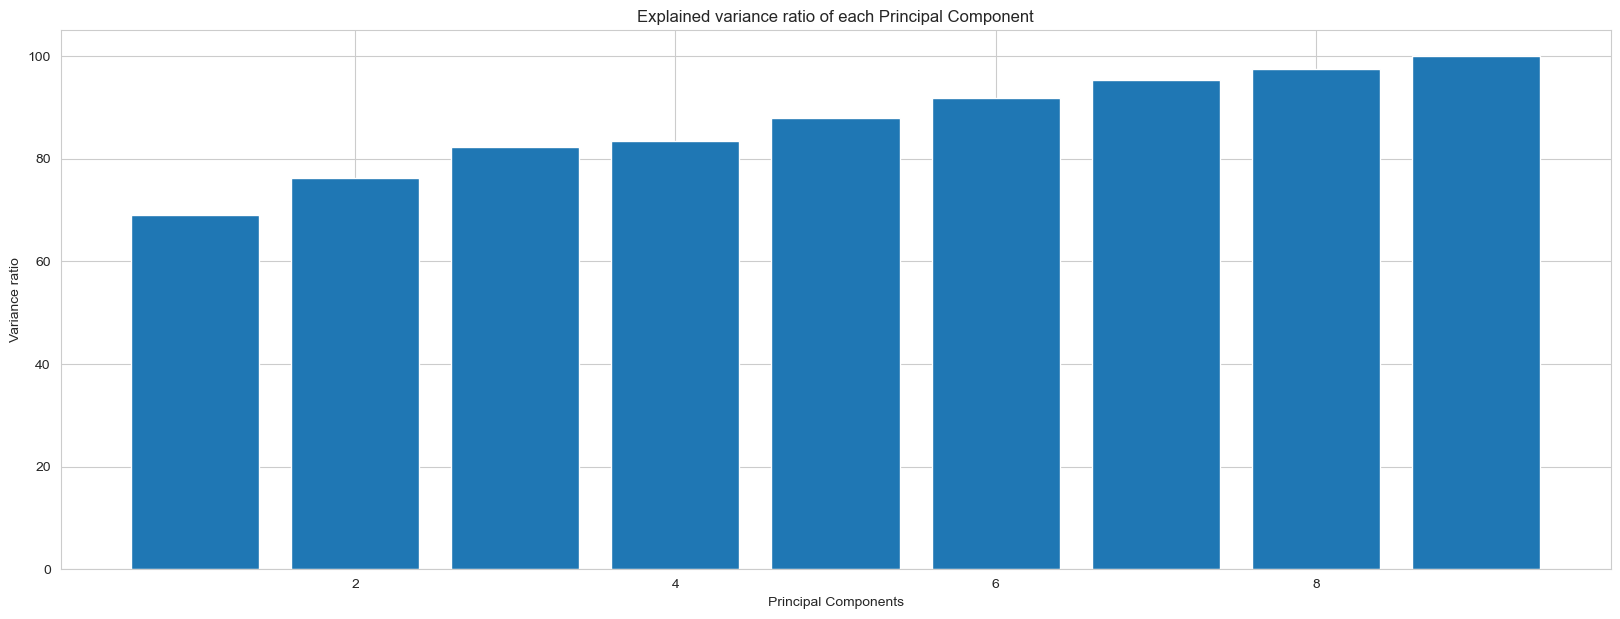

In [53]:
plt.figure(figsize=(20, 7))
plt.bar(range(1, len(cum_var_exp)+1), cum_var_exp, label='Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Variance ratio')
plt.title('Explained variance ratio of each Principal Component')
plt.show()

In [55]:
pca = PCA(n_components=2)
pca.fit(scaled_df)

PCA(n_components=2)

In [56]:
pca.explained_variance_ratio_

array([0.69050756, 0.07195066])

In [57]:
pca.components_

array([[ 0.29673577,  0.40397067,  0.39275858,  0.33120214,  0.24973982,
         0.44261347,  0.29207832,  0.35453597,  0.12457633],
       [-0.07350664,  0.22992885,  0.16470098, -0.09819754,  0.20021505,
        -0.78056963,  0.00847974,  0.46919452,  0.18806889]])

In [64]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)
predict = kmeans.labels_

In [65]:
y = data['Class'].replace({2:0, 4:1})
y

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: int64

In [66]:
count_true = sum(y == predict)
print(f'Accuracy: {count_true/float(y.size)}')

Accuracy: 0.9604685212298683


In [67]:
print("Result: %d out of %d samples were correctly labeled." % (count_true, y.size))

Result: 656 out of 683 samples were correctly labeled.
